In [1]:
# Import needed packages

import numpy as np
import scipy as sp
from scipy.optimize import minimize
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [2]:
def N(I_0,t,T_d):
    return I_0*2**(t/T_d)
print(N(30,50,10))

960.0


In [3]:
# Grab current COVID-19 Data for Denver
D = pd.read_csv("time_series_covid19_confirmed_US.csv")
print(np.shape(D))

(3261, 135)


In [4]:
denver = D.loc[[265]]
denver_data= np.array(denver)
denver_data_frame=denver_data[:,55:]

print(denver,denver_data_frame,np.shape(denver_data_frame))

          UID iso2 iso3  code3    FIPS  Admin2 Province_State Country_Region  \
265  84008031   US  USA    840  8031.0  Denver       Colorado             US   

           Lat       Long_  ... 5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  \
265  39.760183 -104.872569  ...    4452     4548     4656     4720     4790   

     5/20/20  5/21/20  5/22/20  5/23/20  5/24/20  
265     4858     4948     5056     5151     5173  

[1 rows x 135 columns] [[2 2 2 3 4 6 9 17 23 28 28 41 45 61 79 97 125 148 176 214 262 312 367
  408 465 539 586 643 716 769 825 847 884 927 1031 1113 1182 1247 1346
  1402 1468 1549 1636 1723 1784 1880 2004 2071 2172 2385 2487 2583 2682
  2791 2890 3001 3092 3222 3345 3428 3546 3674 3799 3892 4001 4070 4118
  4187 4254 4359 4452 4548 4656 4720 4790 4858 4948 5056 5151 5173]] (1, 80)


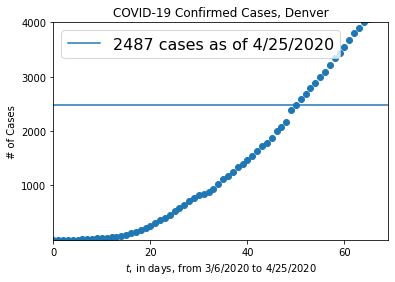

In [5]:
col_size = np.shape(denver_data_frame)[1]

plt.scatter(np.arange(0,col_size,1),denver_data_frame)


plt.axis([0, 69, 1, 4e3])
plt.xlabel('$t$, in days, from 3/6/2020 to 4/25/2020')
plt.ylabel('# of Cases')
plt.title('COVID-19 Confirmed Cases, Denver')
#plt.yscale('log',basey=2)
plt.axhline(y=2487,label='2487 cases as of 4/25/2020')

plt.legend(prop={'size': 16})



params = {'legend.fontsize': 35,
          'legend.handlelength': 3}
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 20
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams.update(params)

plt.show()

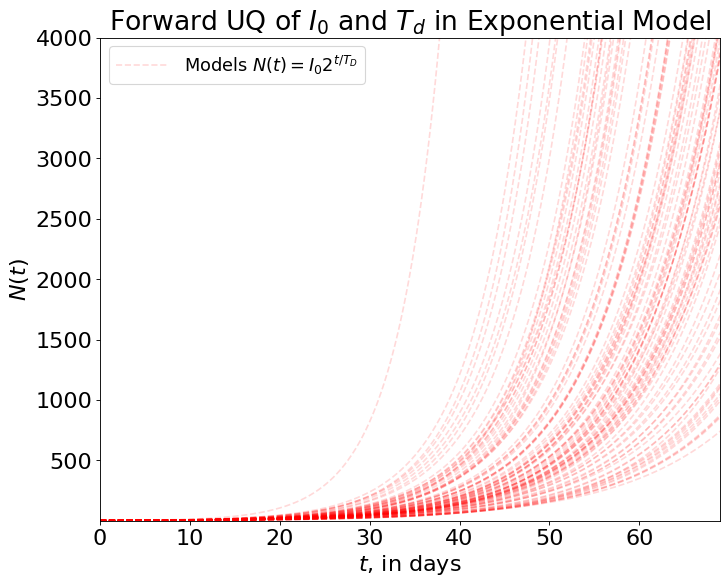

In [6]:
t = np.arange(0, 70, 0.1)
sim_N = 100
I_0_mu, I_0_sigma = 2, 0.3 # mean and standard deviation for I_0
T_d_mu, T_d_sigma = 6, 1 # mean and standard deviation for T_d

plt.plot(t, N(2,t,6), 'r--',alpha=0.15,label='Models $N(t)=I_02^{t/T_D}$')

for i in range(0,sim_N):
    I_0_real, T_d_real = np.random.normal(I_0_mu, I_0_sigma), np.random.normal(T_d_mu, T_d_sigma)
    plt.plot(t, N(I_0_real,t,T_d_real), 'r--',alpha=0.15)
    

plt.axis([0, 69, 1, 4e3])
plt.xlabel('$t$, in days')
plt.ylabel('$N(t)$')
plt.title('Forward UQ of $I_0$ and $T_d$ in Exponential Model')
plt.legend(prop={'size': 16})



params = {'legend.fontsize': 35,
          'legend.handlelength': 3}
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 20
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams.update(params)

plt.show()

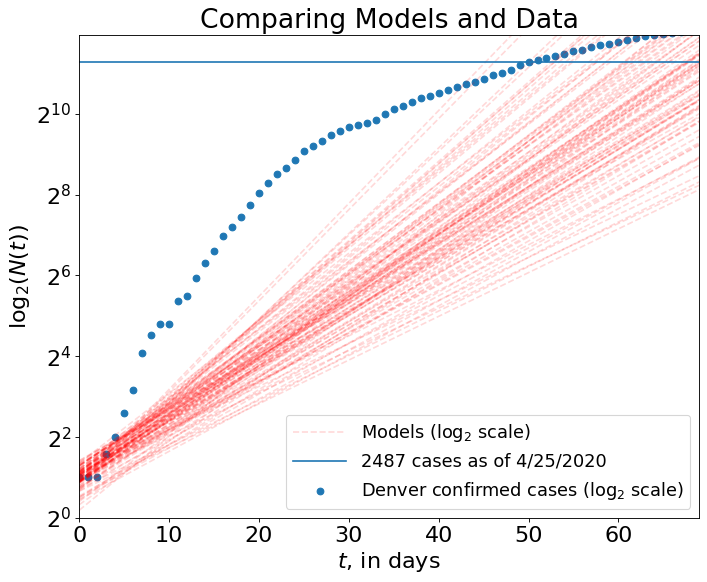

In [7]:
t = np.arange(0, 70, 0.1)
sim_N = 100
I_0_mu, I_0_sigma = 2, 0.3 # mean and standard deviation for I_0
T_d_mu, T_d_sigma = 7, 1 # mean and standard deviation for T_d

plt.plot(t, N(2,t,6), 'r--',alpha=0.15,label='Models (log$_2$ scale)')
#plt.plot(t, N(2,t,6), 'r--',alpha=0.15,label='Models $log_2(N(t))=log_2(I_0)+t/T_D$')

plt.scatter(np.arange(0,col_size,1),denver_data_frame,label='Denver confirmed cases (log$_2$ scale)')   



for i in range(0,sim_N):
    I_0_real, T_d_real = np.random.normal(I_0_mu, I_0_sigma), np.random.normal(T_d_mu, T_d_sigma)
    plt.plot(t, N(I_0_real,t,T_d_real), 'r--',alpha=0.15)

plt.axis([0, 69, 1, 4e3])
plt.xlabel('$t$, in days')
plt.ylabel('$\log_2(N(t))$')
plt.title('Comparing Models and Data')
#plt.title('Forward UQ of $I_0$ and $T_d$ in Exponential Model')
plt.yscale('log',basey=2)
plt.axhline(y=2487,label='2487 cases as of 4/25/2020')

plt.legend(prop={'size': 16})



params = {'legend.fontsize': 35,
          'legend.handlelength': 3}
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 20
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams.update(params)

plt.show()

(100, 1)


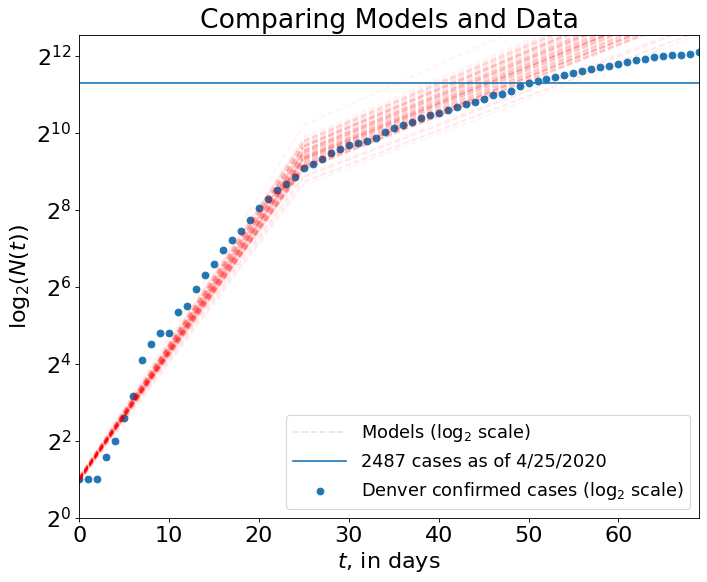

In [8]:
t1 = np.arange(0, 25, 0.1)
t2 = np.arange(25, 70, 0.1)
sim_N = 100
I_0_mu, I_0_sigma = 2, 0.05 # mean and standard deviation for I_0
T_d_mu, T_d_sigma = 3, 0.1 # mean and standard deviation for T_d

plt.plot(t1, N(2,t1,3), 'r--',alpha=0.15,label='Models (log$_2$ scale)')
plt.plot(t2, N(N(2,25,3),t2-25,3.5*3), 'r--',alpha=0.15)
plt.scatter(np.arange(0,col_size,1),denver_data_frame,label='Denver confirmed cases (log$_2$ scale)')   

prediction_sto = np.array(0)

for i in range(0,sim_N):
    I_0_real, T_d_real = np.random.normal(I_0_mu, I_0_sigma), np.random.normal(T_d_mu, T_d_sigma)
    plt.plot(t1, N(I_0_real,t1,T_d_real), 'r--',alpha=0.05)
    plt.plot(t2,N(N(I_0_real,25,T_d_real),t2-25,3.5*T_d_real), 'r--',alpha=0.05)
    pr_f = N(I_0_real,56,T_d_real)
    prediction_sto=np.vstack((prediction_sto,pr_f))

prediction_storage = prediction_sto[1:]

print(np.shape(prediction_storage))

plt.axis([0, 69, 1, 6e3])
plt.xlabel('$t$, in days')
plt.ylabel('$\log_2(N(t))$')
plt.title('Comparing Models and Data')
plt.yscale('log',basey=2)
plt.axhline(y=2487,label='2487 cases as of 4/25/2020')

plt.legend(prop={'size': 16})



params = {'legend.fontsize': 35,
          'legend.handlelength': 3}
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 20
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams.update(params)

plt.show()

954491.4404370883 (9.686428513973973e-05, 1.0754095962599545e-18)


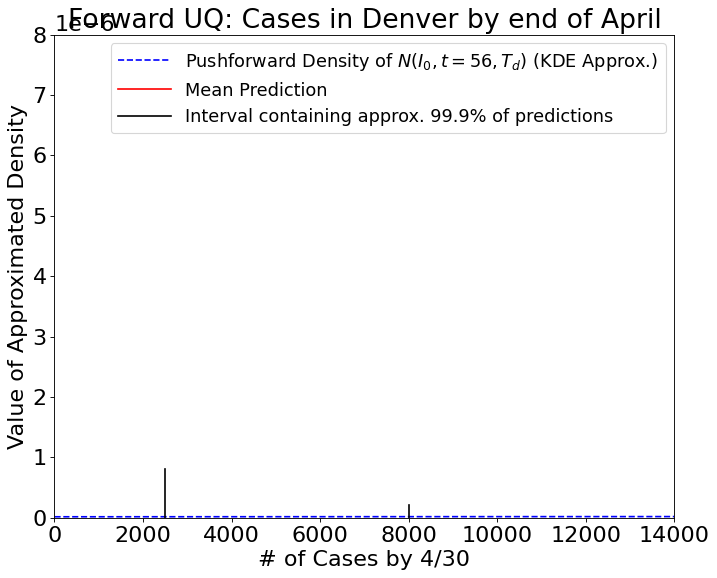

In [9]:
prediction_kde=sp.stats.gaussian_kde(np.transpose(prediction_storage))

print(np.average(prediction_storage),sp.integrate.quad(lambda x: prediction_kde(x),2500,8000))

t9 = np.arange(0., 15001, 1)

# blue dashes
plt.plot(t9, prediction_kde(t9), 'b--',label='Pushforward Density of $N(I_0,t=56,T_d)$ (KDE Approx.)')

plt.axvline(x=np.average(prediction_storage),label='Mean Prediction',ymax=0.184, color='r')

plt.axvline(x=2500,label='Interval containing approx. 99.9% of predictions',ymax=0.1, color='k')
plt.axvline(x=8000,ymax=0.027, color='k')

plt.axis([0, 1.4e4, 0, 8e-6])
plt.xlabel('# of Cases by 4/30')
plt.ylabel('Value of Approximated Density')
plt.title('Forward UQ: Cases in Denver by end of April')


plt.legend(prop={'size': 16})



params = {'legend.fontsize': 35,
          'legend.handlelength': 3}
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 20
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams.update(params)

plt.show()

In [10]:
print(2**11)

2048
